# Name selection example

This jupyter notebook implements a solution algorithm for subset selection in order to replicate a distribution over the whole population.

Choose the country:

- 'belgium'
- 'hungary'
- 'poland'
- 'sweeden'
- 'switzerland'

In [1]:
country = 'sweeden'

## 1. Load data for all names

Here we load the data for frequencies of all names in Belgium.

- Rows -> Names
- Columns -> Categories

In [2]:
import pandas as pd
from utils import read_data

allNames = read_data('data/' + country + '/data.csv')

allNames

,name,"women,1970-1979","women,1950-1959","women,1960-1969","women,1940-1949","women,1980-1989","women,1990-1999","women,1930-1939","women,2000-2003","women,before 1930",...,"male,Norrbottens","male,Värmlands","male,Örebro","male,Södermanlands","male,Västmanlands","male,Kalmar","male,Kronobergs","male,Jämtlands","male,Blekinge","male,Gotlands"
0,Anna,0.429682,0.073415,0.199866,0.083897,0.300953,0.145449,0.058775,0.026318,0.021889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Eva,0.085620,0.422504,0.270105,0.258057,0.026019,0.006608,0.040033,0.001267,0.007092,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Anders,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025775,0.036345,0.032174,0.027183,0.027607,0.027512,0.019321,0.016463,0.017229,0.006399
3,Peter,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.021276,0.026363,0.025912,0.025474,0.022562,0.021837,0.015151,0.010214,0.014234,0.004868
4,Maria,0.346013,0.098637,0.332227,0.032400,0.216771,0.077389,0.011607,0.012476,0.003062,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7451,Janko,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7452,Ann-Karin,0.000000,0.000299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7453,Shubham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7454,Selman,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 2. Define candidate names

Here we select the candidate names considered, which are the ones with frequency in the range:

$$low < f_i < high$$


In [3]:
multiplier = 100 / allNames.sum(axis=1, numeric_only=True).sum()

low, high = 0.1, 0.2

candidates = allNames[(allNames.sum(axis=1, numeric_only=True) > multiplier * low) & (allNames.sum(axis=1, numeric_only=True) < multiplier * high)]

candidates

,name,"women,1970-1979","women,1950-1959","women,1960-1969","women,1940-1949","women,1980-1989","women,1990-1999","women,1930-1939","women,2000-2003","women,before 1930",...,"male,Norrbottens","male,Värmlands","male,Örebro","male,Södermanlands","male,Västmanlands","male,Kalmar","male,Kronobergs","male,Jämtlands","male,Blekinge","male,Gotlands"
311,Tilda,0.000000,0.000000,0.000000,0.000000,0.001139,0.013216,0.000000,0.025378,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
312,Natalie,0.002991,0.000299,0.000741,0.000000,0.013145,0.024908,0.000000,0.007762,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
328,Michelle,0.003090,0.000328,0.001339,0.000000,0.007790,0.023427,0.000000,0.006110,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
334,Ann-Kristin,0.004087,0.022317,0.012433,0.010567,0.001139,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
343,Elina,0.002065,0.000655,0.000897,0.000441,0.012860,0.021733,0.000000,0.008773,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,Hasan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000629,0.000779,0.000520,0.001067,0.000684,0.000588,0.000000,0.000287,0.0
704,Harald,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000451,0.000752,0.000561,0.000547,0.000574,0.000752,0.000834,0.000314,0.000287,0.0
735,Mariana,0.004657,0.004657,0.005697,0.002193,0.005056,0.002037,0.000798,0.000413,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
757,Alaa,0.000983,0.000000,0.000000,0.000000,0.003646,0.005825,0.000000,0.001609,0.000000,...,0.000000,0.000000,0.000314,0.000684,0.000492,0.000602,0.000451,0.000000,0.000301,0.0


## 3. Candidate and original distributions

First, lets define the disstance measures used to fit distributions.

In [4]:
import numpy as np
from scipy.stats import wasserstein_distance
import warnings

warnings.filterwarnings('ignore')

def kldiv(p, q):
    return np.sum(p * np.nan_to_num(np.log(p / q)))

def jsdiv(p, q):
    m = (p + q) / 2
    return (kldiv(p, m) + kldiv(q, m)) / 2

def l2(p, q):
    return np.sum((p - q)**2)**0.5

def l1(p, q):
    return np.sum(np.abs(p - q))

Now, compare the distribution over the candidates and the distribution over all names:

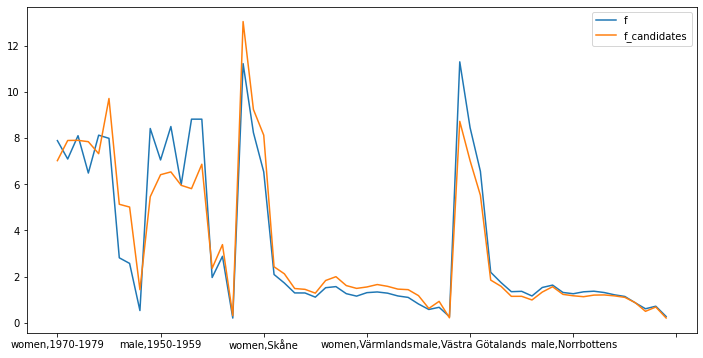

KL divergence: 5.797751686781155
JS divergence: 1.470423133479281
Wasserstein: 0.38349976158474064
L2: 7.995324064714629
L1: 39.641740724742164


In [5]:
import matplotlib.pyplot as plt

f = allNames.sum(axis=0, numeric_only=True)

f_candidates = candidates.sum(axis=0, numeric_only=True)
alpha = (100 / multiplier) / f_candidates.sum()

freq = pd.DataFrame({'f': f, 'f_candidates': alpha * f_candidates})
freq.plot(figsize=(12, 6))
plt.show()

print('KL divergence: {}'.format(kldiv(freq['f'].values, freq['f_candidates'].values)))
print('JS divergence: {}'.format(jsdiv(freq['f'].values, freq['f_candidates'].values)))
print('Wasserstein: {}'.format(wasserstein_distance(freq['f'].values, freq['f_candidates'].values)))
print('L2: {}'.format(l2(freq['f'].values, freq['f_candidates'].values)))
print('L1: {}'.format(l1(freq['f'].values, freq['f_candidates'].values)))

As it can be seen, the distribution over candidates and the original distribution are already similar. But we can do better by selecting a subset of names from the candidates and fit to the original distribution.

## 4. Fit subset distribution to original distribution

Here we fit the distribution of a subset M of the candidates to the original distribution by minimizing
$$
    \min_M \sum_j \left( f^j - \alpha \sum_{i \in M} f_i^j \right)^2 ,
$$
where $$\alpha = \frac{1}{\sum_{l} \sum_{i \in M} f_i^l} .$$

Solving this minimization problem is complicated, since the 𝛼 depends on the subset M. A solution approach to solve this consists in:

1. Fix 𝛼 to a value between a range given by the frequency of candidate names.
2. Solve the resulting quadratic integer programming for a subset of n names.
3. Repeat k times.

So, in practice, we define a space of k alpha values for which we solve the problem:

In [6]:
n = 20
k = 10

alpha_min, alpha_max = 100 / (n * low * multiplier), 100 / (n * high * multiplier)

alpha_space = np.linspace(alpha_min, alpha_max, k)

Solution 1
['Natalie', 'Alex', 'Ingalill', 'Ann-Christine', 'Omar', 'Per-Olof', 'Jon', 'Kaj', 'Elena', 'Joachim', 'Thi', 'Marika', 'Patricia', 'Ruth', 'Ivan', 'Paula', 'Hassan', 'Dick', 'Anja', 'Jerry']


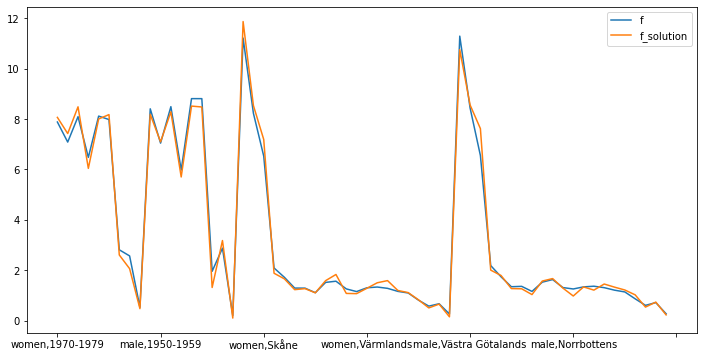

KL divergence: 0.7127486930451336
JS divergence: 0.17367147679278094
Wasserstein: 0.13832052070669182
L2: 2.16520523793802
L1: 11.610895251054366


Solution 2
['Natalie', 'Ingalill', 'Ann-Christine', 'Omar', 'Per-Olof', 'Kaj', 'Joanna', 'Josef', 'Joachim', 'Thi', 'Marika', 'Patricia', 'Ruth', 'Ivan', 'Paula', 'Hassan', 'Mårten', 'Amir', 'Anja', 'Jerry']


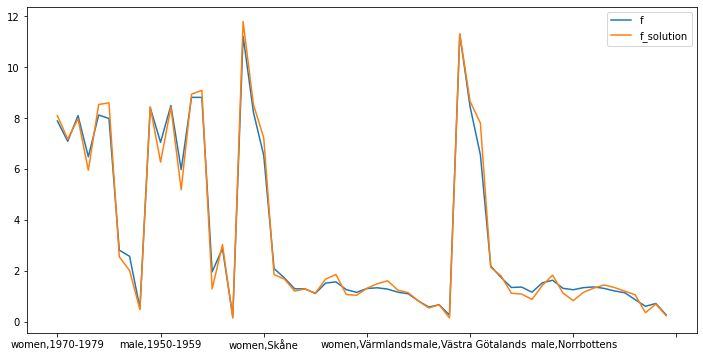

KL divergence: 1.0892684096945846
JS divergence: 0.2641724858727524
Wasserstein: 0.15973207185012928
L2: 2.576737674850041
L1: 13.641241424080121


Solution 3
['Natalie', 'Ann-Kristin', 'Ann-Christine', 'Omar', 'Per-Olof', 'Kaj', 'Joanna', 'Josef', 'Joachim', 'Thi', 'Marika', 'Patricia', 'Ruth', 'Ivan', 'Paula', 'Hassan', 'Mårten', 'Amir', 'Anja', 'Jerry']


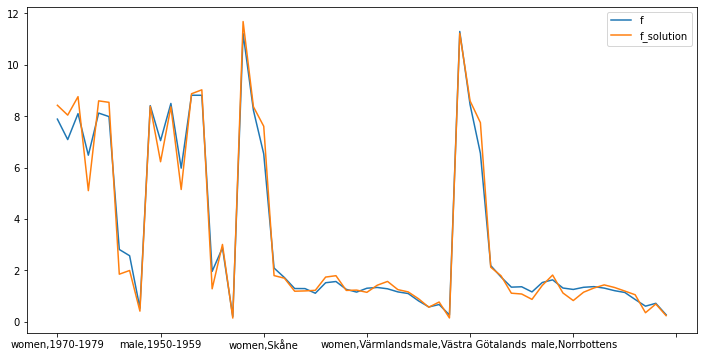

KL divergence: 1.6116322643139798
JS divergence: 0.38895690279502393
Wasserstein: 0.215006814226278
L2: 3.340091728005747
L1: 17.343298517652048


Solution 4
['Natalie', 'Ann-Kristin', 'Ann-Christine', 'Omar', 'Per-Olof', 'Kaj', 'Joanna', 'Josef', 'Joachim', 'Thi', 'Marika', 'Patricia', 'Ruth', 'Ivan', 'Paula', 'Hassan', 'Mårten', 'Amir', 'Anja', 'Jerry']


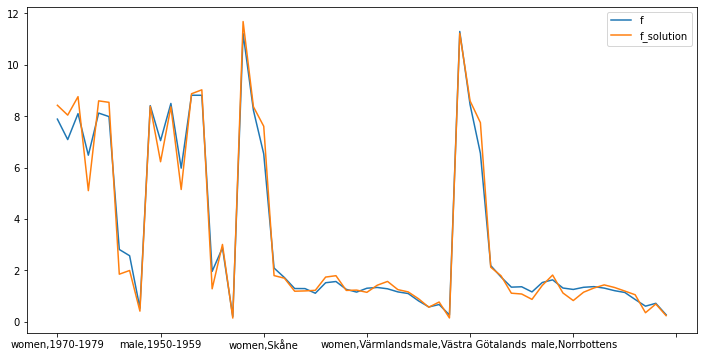

KL divergence: 1.6116322643139798
JS divergence: 0.38895690279502393
Wasserstein: 0.215006814226278
L2: 3.340091728005747
L1: 17.343298517652048


Solution 5
['Natalie', 'Ann-Kristin', 'Alex', 'Ann-Christine', 'Omar', 'Per-Olof', 'Kaj', 'Joanna', 'Josef', 'Joachim', 'Thi', 'Marika', 'Patricia', 'Ruth', 'Ivan', 'Paula', 'Hassan', 'Mårten', 'Anja', 'Jerry']


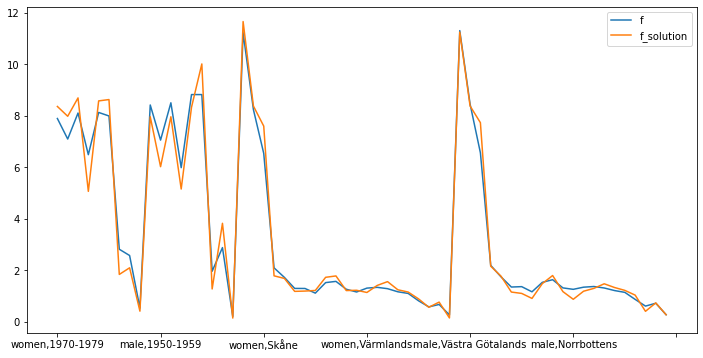

KL divergence: 1.7626963844947081
JS divergence: 0.42970481763731316
Wasserstein: 0.22162466607107065
L2: 3.7485734445385055
L1: 19.82769312765224


Solution 6
['Natalie', 'Ann-Kristin', 'Alex', 'Ann-Christine', 'Omar', 'Per-Olof', 'Kaj', 'Joanna', 'Josef', 'Joachim', 'Thi', 'Marika', 'Patricia', 'Ruth', 'Ivan', 'Paula', 'Hassan', 'Mårten', 'Anja', 'Jerry']


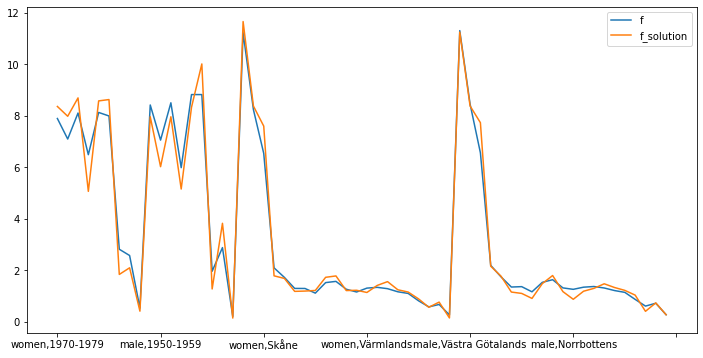

KL divergence: 1.7626963844947081
JS divergence: 0.42970481763731316
Wasserstein: 0.22162466607107065
L2: 3.7485734445385055
L1: 19.82769312765224


Solution 7
['Natalie', 'Ann-Kristin', 'Alex', 'Ann-Christine', 'Omar', 'Per-Olof', 'Kaj', 'Elena', 'Joanna', 'Josef', 'Joachim', 'Thi', 'Marika', 'Patricia', 'Ruth', 'Ivan', 'Paula', 'Hassan', 'Mårten', 'Jerry']


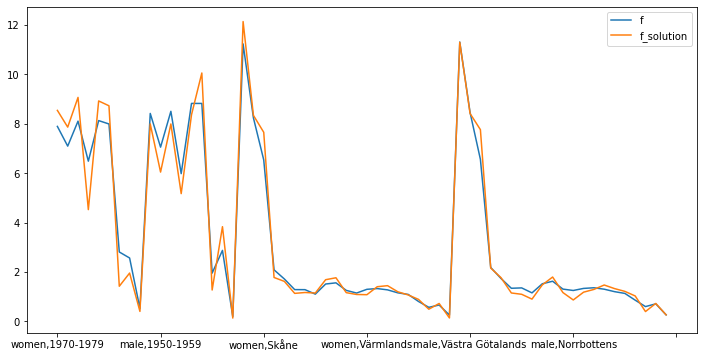

KL divergence: 2.372340791604997
JS divergence: 0.5670518772567177
Wasserstein: 0.2589995204567714
L2: 4.3404496526059
L1: 22.081347651527423


Solution 8
['Natalie', 'Ann-Kristin', 'Alex', 'Ann-Christine', 'Omar', 'Per-Olof', 'Kaj', 'Elena', 'Joanna', 'Josef', 'Joachim', 'Thi', 'Marika', 'Patricia', 'Ruth', 'Ivan', 'Paula', 'Hassan', 'Mårten', 'Jerry']


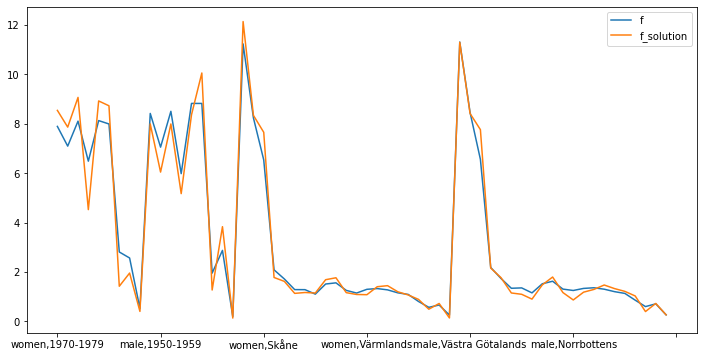

KL divergence: 2.372340791604997
JS divergence: 0.5670518772567177
Wasserstein: 0.2589995204567714
L2: 4.3404496526059
L1: 22.081347651527423


Solution 9
['Natalie', 'Ann-Kristin', 'Alex', 'Ann-Christine', 'Omar', 'Per-Olof', 'Kaj', 'Elena', 'Joanna', 'Josef', 'Joachim', 'Thi', 'Marika', 'Patricia', 'Ivan', 'Paula', 'Hassan', 'Mårten', 'Jane', 'Jerry']


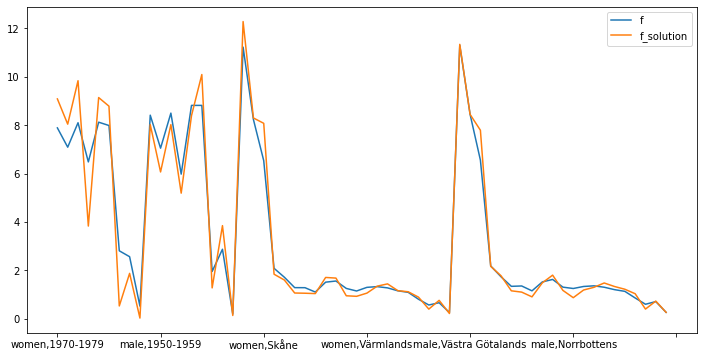

KL divergence: 5.977166746925863
JS divergence: 1.1901490377154818
Wasserstein: 0.33643041373082194
L2: 5.581258543258944
L1: 26.812084342419592


Solution 10
['Natalie', 'Ann-Kristin', 'Alex', 'Ann-Christine', 'Omar', 'Per-Olof', 'Kaj', 'Elena', 'Joanna', 'Josef', 'Joachim', 'Thi', 'Marika', 'Patricia', 'Ivan', 'Paula', 'Hassan', 'Mårten', 'Jane', 'Jerry']


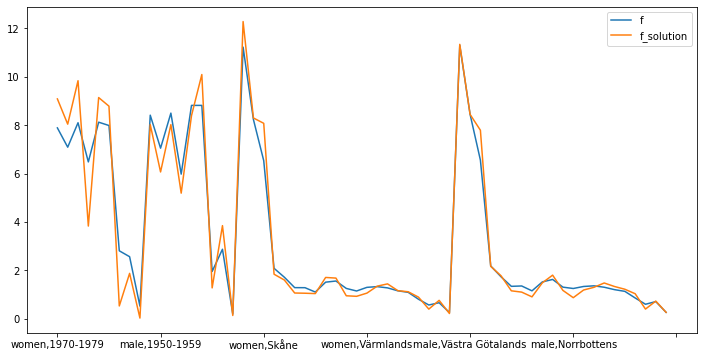

KL divergence: 5.977166746925863
JS divergence: 1.1901490377154818
Wasserstein: 0.33643041373082194
L2: 5.581258543258944
L1: 26.812084342419592




In [7]:
import cvxpy as cp

for i, alpha in enumerate(alpha_space, 1):
    A = alpha * candidates.select_dtypes(np.number).to_numpy().T
    b = f.to_numpy()
    x = cp.Variable(len(candidates), boolean=True)

    objective = cp.Minimize(cp.sum_squares(A @ x - b))
    prob = cp.Problem(objective, [cp.sum(x) == n])
    prob.solve()

    solution = candidates[x.value != 0]
    f_solution = solution.sum(axis=0, numeric_only=True)
    real_alpha = (100 / multiplier) / f_solution.sum()

    print('Solution {}'.format(i))
    print(candidates['name'][x.value != 0].to_list())    

    freq = pd.DataFrame({'f': f, 'f_solution': real_alpha * f_solution})
    freq.plot(figsize=(12, 6))
    plt.show()

    print('KL divergence: {}'.format(kldiv(freq['f'].values, freq['f_solution'].values)))
    print('JS divergence: {}'.format(jsdiv(freq['f'].values, freq['f_solution'].values)))
    print('Wasserstein: {}'.format(wasserstein_distance(freq['f'].values, freq['f_solution'].values)))
    print('L2: {}'.format(l2(freq['f'].values, freq['f_solution'].values)))
    print('L1: {}'.format(l1(freq['f'].values, freq['f_solution'].values)))
    print('\n')

As you can see, these solutions resemble more the original distribution than the candidate names distribution. Some of them are actually very similar, but in case that better solutions are required, it is possible to design a genetic algorithm which starts from a population composed by these k solutions.